In [1]:
# Подсчёт pi с использованием метода Монте-Карло

In [19]:
import random
import random
import matplotlib.pyplot as plt
i = 0
count = 0
data = []
n = 1000 #кол-во бросков
while i < n:
    x = random.random()
    y = random.random()
    if (pow(x,2) + pow(y, 2)) < 1:
        count +=1
        data.append((x,y, "red"))
    else:
        i+=1
        data.append((x,y, "blue"))


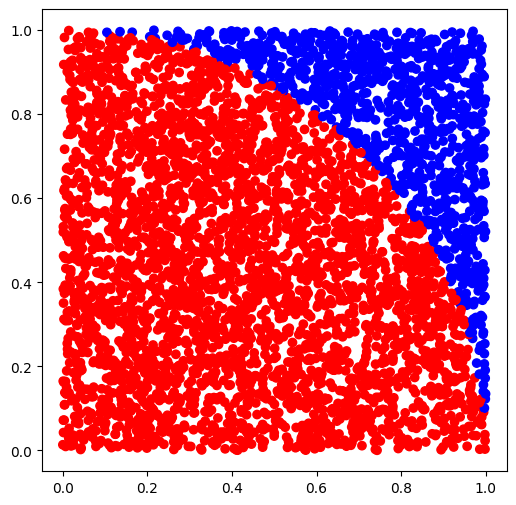

In [21]:
x, y, colors = zip(*data)
fig,ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)
ax.scatter(x, y, c=colors)

In [27]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian(nx: int = 100):
# gaussian array y in interval -5 <= x <= 5 nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
    x, y = noisy_gaussian()
@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)


interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [34]:
from ipywidgets import interact
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian(nx: int = 100):
    # gaussian array y in interval -5 <= x <= 5 nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()


@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [42]:
import random

def step():
    return 1 if random.random() > 0.5 else -1

In [43]:


def walk(n):
    x = np.zeros(n)
    dx = 1 / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [46]:

n = 100000
x = walk(n)


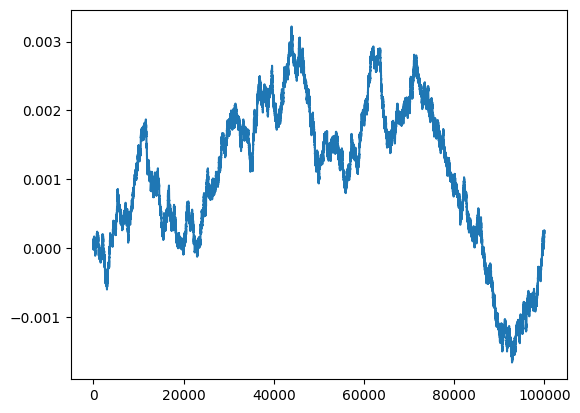

In [48]:
plt.plot(x);

In [50]:
#time
t1 = %timeit -o walk(n)

20.3 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
#best time
t1.best

0.019366191601147876

In [61]:
%%prun
walk(n)

In [63]:
%lprun -f walk walk(10000)